In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

from scipy import stats
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [6]:
data = pd.read_excel('/Users/ashutoshanand/Documents/UGP- Sanjiv/Dataset and Code files/Tomato Processed data.xlsx',index_col='Date')

In [8]:
data

,W.sale Avg.Price,Inflation_rate,Growth_rate,Log_MS,Month,Year,Quarter,W.sale Avg.Price_1M_Lag,W.sale Avg.Price_3M_Lag,Inflation_rate_1M_Lag,...,Growth_rate_1M_Lag,Growth_rate_3M_Lag,Log_MS_1M_Lag,Log_MS_3M_Lag,Price_3M_Rolling_Mean,Price_6M_Rolling_Mean,Price_3M_Rolling_Std,Price_6M_Rolling_Std,Inflation_Growth_Interaction,seasonal_component
Date,,,,,,,,,,,,,,,,,,,,,
2000-06-01,1182.0,5.238095,38.171534,16.281510,6,2000,2,736.0,392.0,5.011930,...,38.194843,30.215964,16.267717,16.235144,719.333333,599.500000,471.221109,332.994745,199.946120,1.244693
2000-07-01,953.0,4.952828,13.306099,16.281959,7,2000,3,1182.0,240.0,5.238095,...,38.171534,27.288814,16.281510,16.261410,957.000000,657.833333,223.026904,363.031909,65.902813,1.386104
2000-08-01,944.0,3.990609,22.953398,16.288343,8,2000,3,953.0,736.0,4.952828,...,13.306099,38.194843,16.281959,16.267717,1026.333333,741.166667,134.886372,361.513716,91.598023,1.185297
2000-09-01,920.0,3.496508,41.795593,16.303125,9,2000,3,944.0,1182.0,3.990609,...,22.953398,38.171534,16.288343,16.281510,939.000000,829.166667,17.058722,321.577622,146.138613,1.137432
2000-10-01,3500.0,2.746003,47.315842,16.319555,10,2000,4,920.0,953.0,3.496508,...,41.795593,13.306099,16.303125,16.281959,1788.000000,1372.500000,1482.684053,1051.858118,129.929446,1.408927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,2511.0,6.998158,-0.679758,19.165064,8,2022,3,2389.0,4426.0,6.707692,...,2.205323,19.721981,19.164157,19.147374,3242.000000,2826.500000,1373.139833,1476.515188,-4.757056,1.185297
2022-09-01,3837.0,7.414216,3.320463,19.166083,9,2022,3,2511.0,4826.0,6.998158,...,-0.679758,12.622150,19.165064,19.146480,2912.333333,3238.833333,803.104808,1323.604989,24.618631,1.137432
2022-10-01,4450.0,6.767372,-4.074074,19.176894,10,2022,4,3837.0,2389.0,7.414216,...,3.320463,2.205323,19.166083,19.164157,3599.333333,3739.833333,991.107630,1048.727117,-27.570773,1.408927


In [10]:
X = data.drop('W.sale Avg.Price', axis=1)
y = data['W.sale Avg.Price']

In [12]:
# Prepare data for training
features = X  # or use X[selected_features] if you did feature selection
target = y

# Create time series split for validation
tscv = TimeSeriesSplit(n_splits=5)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, shuffle=False  # No shuffle for time series
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models to try
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }
    
    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

# Find best model
best_model_name = min(results, key=lambda x: results[x]['rmse'])
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name}")

# Hyperparameter tuning for best model (example for Random Forest)
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    
    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid=param_grid,
        cv=tscv,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")


Linear Regression - RMSE: 568.71, MAE: 423.00, R²: 0.73
Ridge Regression - RMSE: 567.84, MAE: 413.64, R²: 0.74
Random Forest - RMSE: 699.06, MAE: 494.27, R²: 0.60
Gradient Boosting - RMSE: 732.73, MAE: 479.53, R²: 0.56

Best model: Ridge Regression


In [14]:
# After selecting the best model
best_model_name = min(results, key=lambda x: results[x]['rmse'])
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name}")

#Generate predictions using the best model before evaluation
y_pred = best_model.predict(X_test_scaled)

# Now calculate evaluation metrics using predictions from the best model
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)



Best model: Ridge Regression


Price Forecast:
        Date  Predicted_Price
0 2023-01-01      3031.847435
1 2023-02-01      3002.140927
2 2023-03-01      2972.434419

Model Evaluation on Test Data:
Mean Squared Error (MSE): 322447.3053
Root Mean Squared Error (RMSE): 567.8444
Mean Absolute Error (MAE): 413.6394
R-squared (R²): 0.7354
Mean Absolute Percentage Error (MAPE): 17.29%


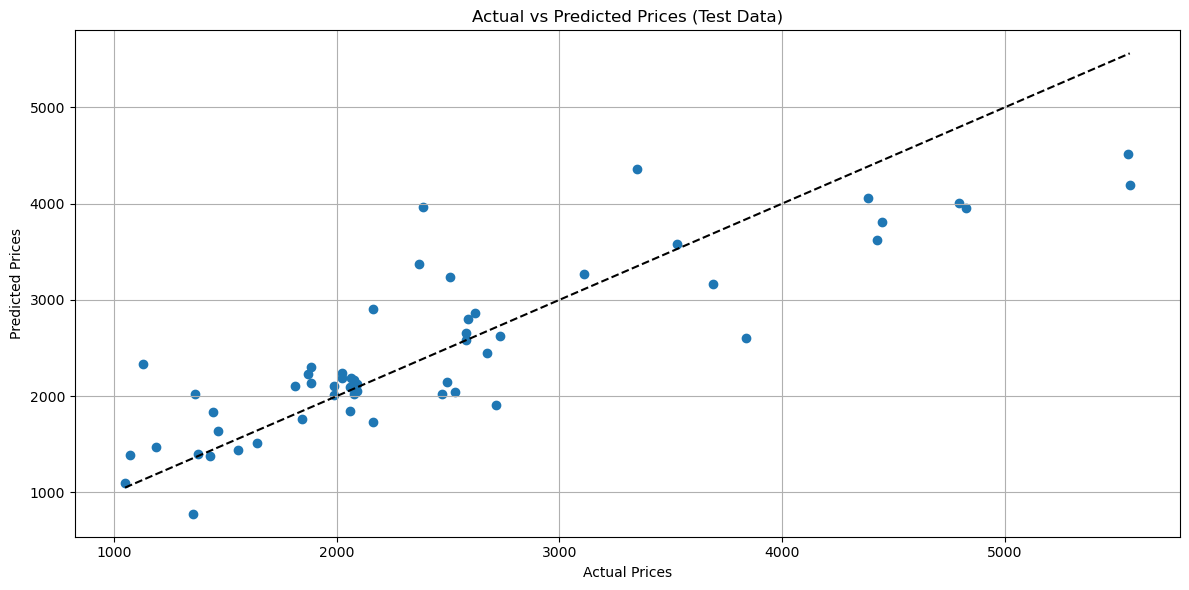

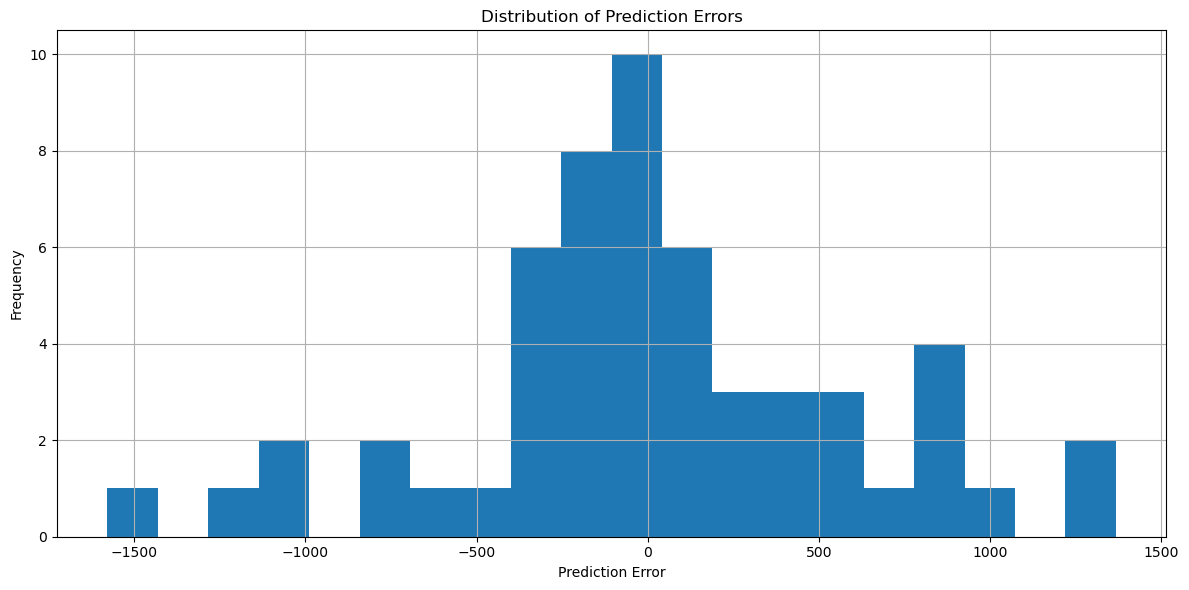

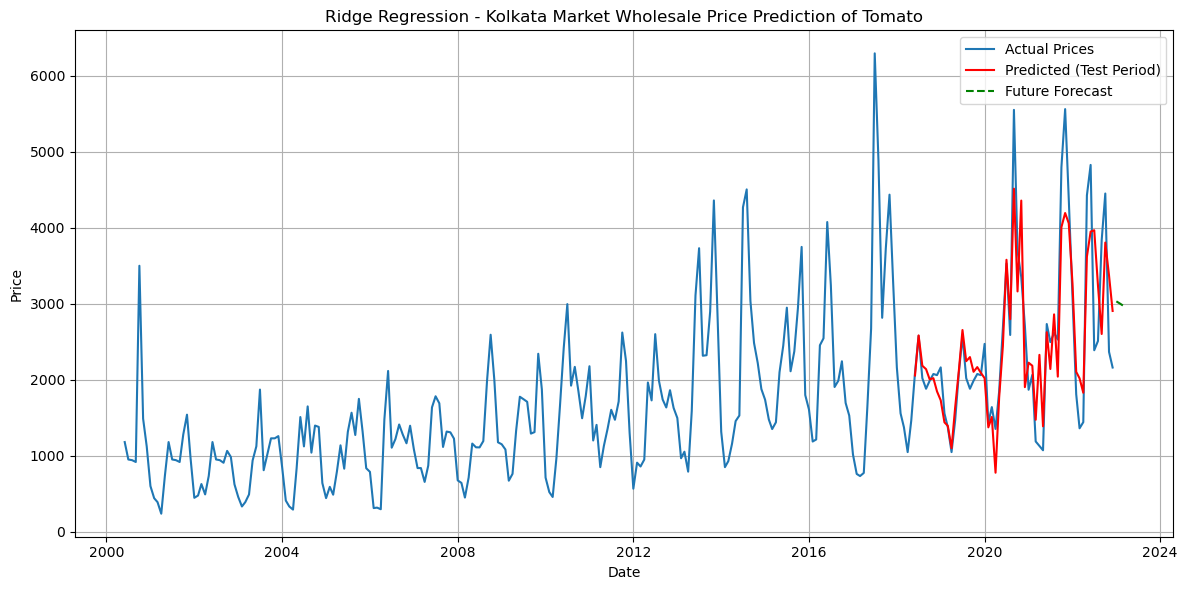

In [16]:
# Function to predict future prices
def predict_prices(model, future_features, scaler):
    """
    Predict prices based on future features
    """
    # Scale features
    future_features_scaled = scaler.transform(future_features)
    
    # Make predictions
    predictions = model.predict(future_features_scaled)
    
    return predictions

# Example: Predict next 3 months
# (In a real scenario, you would need to prepare future_features with actual data)
# This is just a placeholder example assuming you have some future data

# Get the last date in your dataset
last_date = data.index[-1]

# Create some future dates
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=30), periods=3, freq='MS')

# Create a dummy dataframe with the same features as your training data
# In reality, you would fill this with actual future values for your predictors
future_df = pd.DataFrame(index=future_dates, columns=X.columns)

# Example: Fill with last known values (very simplistic approach)
for col in future_df.columns:
    future_df[col] = X[col].iloc[-1]

# Update temporal features
future_df['Month'] = future_df.index.month
future_df['Year'] = future_df.index.year
future_df['Quarter'] = future_df.index.quarter

# Make predictions
future_predictions = predict_prices(best_model, future_df, scaler)

# Create results dataframe
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_predictions
})

print("Price Forecast:")
print(forecast_df)

# ------------ ADDED MODEL EVALUATION CODE ------------

# 1. Evaluate model performance on test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics for test predictions
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)  # Root Mean Squared Error
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print evaluation results for test data
print("\nModel Evaluation on Test Data:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"R-squared (R²): {test_r2:.4f}")

# Calculate MAPE (Mean Absolute Percentage Error)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {test_mape:.2f}%")

# 2. Evaluate model performance on future predictions if actual values become available
# Uncomment and use this code when you have actual future values to compare with predictions
"""
# Assuming future_actual_prices contains actual prices for the forecast period
future_actual_prices = [...]  # Replace with actual future prices when available

future_mse = mean_squared_error(future_actual_prices, future_predictions)
future_rmse = np.sqrt(future_mse)
future_mae = mean_absolute_error(future_actual_prices, future_predictions)
future_r2 = r2_score(future_actual_prices, future_predictions)
future_mape = np.mean(np.abs((future_actual_prices - future_predictions) / future_actual_prices)) * 100

print("\nModel Evaluation on Future Predictions:")
print(f"Mean Squared Error (MSE): {future_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {future_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {future_mae:.4f}")
print(f"R-squared (R²): {future_r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {future_mape:.2f}%")
"""

# 3. Visualize prediction errors on test data
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Test Data)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Plot error distribution
prediction_errors = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.hist(prediction_errors, bins=20)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['W.sale Avg.Price'], label='Actual Prices')
plt.plot(X_test.index, y_pred, color='red', label='Predicted (Test Period)')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Price'], 'g--', label='Future Forecast')
plt.title('Ridge Regression - Kolkata Market Wholesale Price Prediction of Tomato')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
